## Week 8 Homework

---

### Q1: derive the following

1. $p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma=\sigma^2 I)$ for the **linear regression model** likelihood proportional to $\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)$ and a $\mathcal{MVN}(\boldsymbol\beta_0, \boldsymbol\Sigma_\beta)$ for $\boldsymbol\beta$

2. The analytical posterior distribution for $\sigma^2$ the **error variance** of a **linear regression model** with **design matrix** $\mathbf{X}$ assuming $\sigma^2$ has an **inverse-gamma** prior distribution with parameters $\alpha^*$ and $\beta^*$ (unrelated to $\boldsymbol \beta$).

**1. Posterior of** $$ p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma = \sigma^2 I) $$  

**Likelihood Function:** Given a linear regression model,  
$$ y = \mathbf{X} \boldsymbol{\beta} + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2 I) $$  
The likelihood function is:  
$$ p(y | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) \propto \exp \left( -\frac{1}{2\sigma^2} (y - \mathbf{X} \boldsymbol{\beta})^\top (y - \mathbf{X} \boldsymbol{\beta}) \right) $$  

**Prior on** $ \boldsymbol{\beta} $: Assume a normal prior,  
$$ \boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_\beta) $$  
$$ p(\boldsymbol{\beta}) \propto \exp \left( -\frac{1}{2} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0) \right) $$  

**Posterior Computation:** Using Bayes' theorem,  
$$ p(\boldsymbol{\beta} | y, \mathbf{X}, \sigma^2) \propto p(y | \boldsymbol{\beta}, \mathbf{X}, \sigma^2) p(\boldsymbol{\beta}) $$  
Since both the likelihood and prior are Gaussian, the posterior is also Gaussian:  
$$ p(\boldsymbol{\beta} | y, \mathbf{X}, \sigma^2) = \mathcal{N}(\boldsymbol{\beta}_n, \boldsymbol{\Sigma}_n) $$  

where  
$$ \boldsymbol{\Sigma}_n = \left( \mathbf{X}^\top \mathbf{X} / \sigma^2 + \boldsymbol{\Sigma}_\beta^{-1} \right)^{-1} $$  
$$ \boldsymbol{\beta}_n = \boldsymbol{\Sigma}_n \left( \mathbf{X}^\top y / \sigma^2 + \boldsymbol{\Sigma}_\beta^{-1} \boldsymbol{\beta}_0 \right) $$  

**2. Posterior of** $ \sigma^2 $ **with an Inverse-Gamma Prior**  

**Prior on** $ \sigma^2 $: Assume an inverse-gamma prior,  
$$ \sigma^2 \sim \text{Inv-Gamma}(\alpha^*, \beta^*) $$  

**Posterior Computation:** The posterior distribution remains inverse-gamma,  
$$ p(\sigma^2 | y, \mathbf{X}) = \text{Inv-Gamma}(\alpha_n, \beta_n) $$  
where  
$$ \alpha_n = \alpha^* + \frac{n}{2} $$  
$$ \beta_n = \beta^* + \frac{1}{2} (y - \mathbf{X} \boldsymbol{\beta}_n)^\top (y - \mathbf{X} \boldsymbol{\beta}_n) + \frac{1}{2} (\boldsymbol{\beta}_n - \boldsymbol{\beta}_0)^\top \boldsymbol{\Sigma}_\beta^{-1} (\boldsymbol{\beta}_n - \boldsymbol{\beta}_0) $$  


### Q2: perform Bayesian Linear Regression

- For any data set you find interesting (perhaps from kaggle.com?)
- Use an appropriate non **inverse-gamma** prior for `sigma`
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than a `pm.MvNormal` alternative
- Use `pm.Normal('y', mu=X@betas, sigma=sigma, observed=y)` rather than `pm.MvNormal` alternative
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics



<ipython-input-1-215a6473e0be>:13: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 171k/171k [00:00<00:00, 885kB/s]


Output()

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   5.887  0.440   5.072    6.739      0.006    0.004    6333.0   
betas[1]  14.153  0.448  13.354   15.001      0.006    0.004    5123.0   
betas[2]   0.680  0.458  -0.182    1.539      0.006    0.005    6230.0   
betas[3]   0.488  0.446  -0.334    1.354      0.006    0.005    6285.0   
betas[4]   0.262  0.450  -0.579    1.126      0.005    0.006    6704.0   
sigma     49.634  0.285  49.109   50.170      0.004    0.003    5395.0   

          ess_tail  r_hat  
betas[0]    3044.0    1.0  
betas[1]    3081.0    1.0  
betas[2]    3050.0    1.0  
betas[3]    3048.0    1.0  
betas[4]    3483.0    1.0  
sigma       2928.0    1.0  


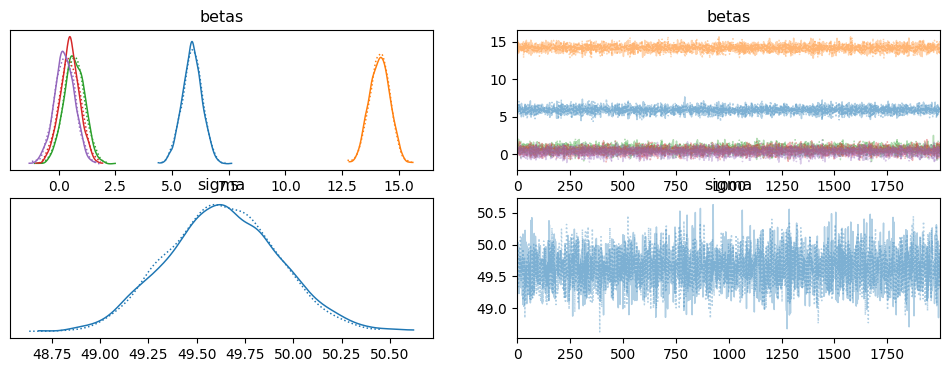

In [1]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Student_Performance.csv"

# Load dataset from Kaggle
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "nikhil7280/student-performance-multiple-linear-regression",
    file_path,
)

features = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]
target = "Performance Index"

df["Extracurricular Activities"] = df["Extracurricular Activities"].map(
    {"Yes": 1, "No": 0}
)
features.append("Extracurricular Activities")

X = df[features].values
y = df[target].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n, p = X_scaled.shape

with pm.Model() as model:
    sigma = pm.HalfNormal("sigma", sigma=1)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)
    y_obs = pm.Normal("y", mu=pm.math.dot(X_scaled, betas), sigma=sigma, observed=y)
    trace = pm.sample(2000, return_inferencedata=True)

summary = az.summary(trace, var_names=["betas", "sigma"])
print(summary)

az.plot_trace(trace, var_names=["betas", "sigma"])
plt.show()

### Q3: perform robust Bayesian Linear Regression

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\boldsymbol \beta, \tau,\tau_i)$ be $\mathcal{N}(y_i | \textbf{X} \boldsymbol \beta, \overset{\textrm{precision}}{\tau \times \tau_i})$.

- Return to your dataset and maniputate it to have some various outliers or find another dataset with some outlier data
- Use an appropriate prior for inference on $v$ if you have enough data to do so
- Use the posterior distributions of the $\tau_i$'s to identify data point "outliers"
- Use the posterior distributions of the $\sigma_i^{-2} = \tau \times \tau_i$ to create posterior distribuitions of the **influence** (the diagonals of the $H$ "hat" matrix $X^\top (X^\top D X)^{-1} X$ where $D_{ij}=0$ and $D_{ii} = \sigma^2_i$) and compare and contras some example "outlier" versus "non outlier" data points

- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


             mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]    5.607   0.479    4.665    6.457      0.009    0.007    2671.0   
betas[1]   13.462   0.482   12.571   14.353      0.010    0.007    2207.0   
betas[2]    0.644   0.472   -0.194    1.563      0.010    0.008    2382.0   
betas[3]    0.473   0.498   -0.388    1.460      0.010    0.010    2324.0   
betas[4]    0.268   0.475   -0.583    1.218      0.010    0.010    2241.0   
tau         0.000   0.000    0.000    0.000      0.000    0.000    3339.0   
nu        255.085  33.494  201.091  319.157     13.014    9.641       7.0   

          ess_tail  r_hat  
betas[0]    1505.0   1.00  
betas[1]    1444.0   1.00  
betas[2]    1535.0   1.00  
betas[3]    1420.0   1.00  
betas[4]    1573.0   1.00  
tau         1300.0   1.00  
nu            83.0   1.24  
Posterior mean tau_i: [0.99728596 1.002387   0.99735546 ... 0.99782469 0.99769219 0.99804725]
Posterior mean sigma_i: [55.69633846 55.53508467 55.68447723 ... 

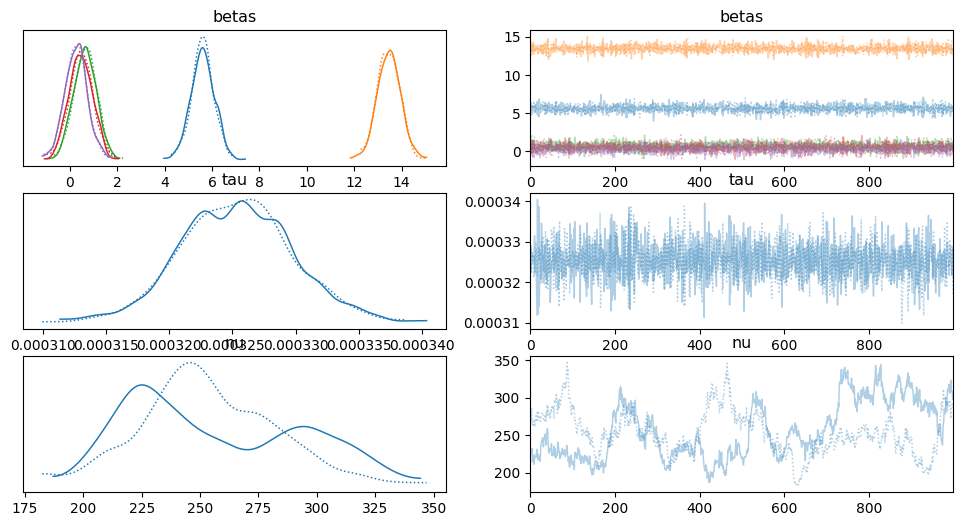

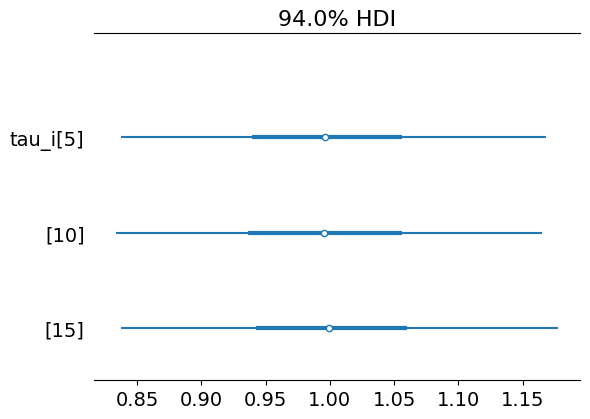

In [7]:
import numpy as np

with pm.Model() as robust_model:
    tau = pm.HalfCauchy("tau", beta=1.0)
    nu = pm.Exponential("nu", 0.1)
    betas = pm.Normal("betas", mu=0.0, sigma=1.0, shape=p)
    tau_i = pm.Gamma("tau_i", alpha=nu / 2.0, beta=nu / 2.0, shape=n)
    mu = pm.math.dot(X_scaled, betas)
    sigma_i = pm.Deterministic("sigma_i", 1.0 / pm.math.sqrt(tau * tau_i))
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma_i, observed=y)
    trace_robust = pm.sample(
        1000,
        tune=1000,
        target_accept=0.9,
        return_inferencedata=True,
        random_seed=1
    )

print(az.summary(trace_robust, var_names=["betas", "tau", "nu"]))
post_tau_i_mean = trace_robust.posterior["tau_i"].mean(dim=["chain", "draw"]).values
post_sigma_i_mean = trace_robust.posterior["sigma_i"].mean(dim=["chain", "draw"]).values

print("Posterior mean tau_i:", post_tau_i_mean)
print("Posterior mean sigma_i:", post_sigma_i_mean)

def compute_hat_diagonal(Xmat, sigma2_vec):
    """
    Compute the diagonal of the hat matrix H = X (X^T D X)^(-1) X^T
    where D = diag(sigma2_vec).
    """
    D = np.diag(sigma2_vec)
    xtdx_inv = np.linalg.inv(Xmat.T @ np.linalg.inv(D) @ Xmat)
    W = np.diag(1.0 / sigma2_vec)
    xtwx_inv = np.linalg.inv(Xmat.T @ W @ Xmat)
    H = Xmat @ xtwx_inv @ Xmat.T @ W
    return np.diag(H)

sigma2_i_mean = post_sigma_i_mean**2
h_diag = compute_hat_diagonal(X_scaled, sigma2_i_mean)
print("Hat matrix diagonals (using posterior mean sigma_i^2):")
print(h_diag)

az.plot_trace(trace_robust, var_names=["betas", "tau", "nu"], compact=True)
plt.show()

idx_outliers = [5, 10, 15]
az.plot_forest(
    trace_robust,
    var_names=["tau_i"],
    coords={"tau_i_dim_0": idx_outliers},
    combined=True
)
plt.tight_layout()
plt.show()
